## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





In [1]:
#scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza 
# % di volte che è uscita testa
import numpy as np

def lancio_moneta(N):

    lanci = np.random.choice([0, 1], size=N)
    frequenza_teste = np.mean(lanci) * 100

    return frequenza_teste

In [5]:
#Calcolare la frequenza % con la grandezze del campione (numero di lanci) 
# che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
campioni = np.linspace(10, 20000, 100, dtype=int) #mi fornisce 100 grandezze del campione 
frequenze_teste = [] #lista vuota

for N in campioni:
    frequenze_teste.append(lancio_moneta(N))

print(frequenze_teste)
#le frequenze al crescere di N tendono al 50%

[np.float64(50.0), np.float64(50.71090047393365), np.float64(48.426150121065376), np.float64(46.5040650406504), np.float64(49.20440636474908), np.float64(51.81550539744848), np.float64(51.269451269451274), np.float64(52.28390723822909), np.float64(46.400000000000006), np.float64(49.042145593869726), np.float64(49.08822079842287), np.float64(49.843119677274764), np.float64(48.581997533908755), np.float64(53.075170842824605), np.float64(51.8688293370945), np.float64(49.53917050691244), np.float64(49.629629629629626), np.float64(49.30273097036606), np.float64(48.98463227222832), np.float64(49.609984399375975), np.float64(49.851778656126484), np.float64(50.44705882352941), np.float64(49.887690925426774), np.float64(50.42973785990546), np.float64(51.09143327841845), np.float64(50.049436424757765), np.float64(49.38201178931356), np.float64(49.11188427028017), np.float64(51.29789864029666), np.float64(49.95737425404945), np.float64(49.33245426075491), np.float64(49.29015791992343), np.float64

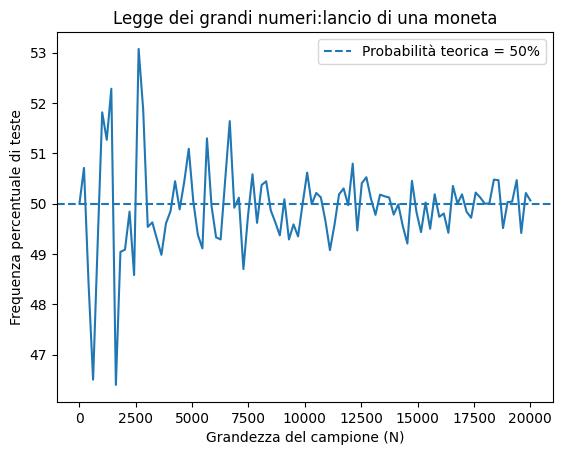

In [9]:
#Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(campioni, frequenze_teste)
#traccio la probabilità teorica
plt.axhline(50, linestyle='--', label='Probabilità teorica = 50%')

plt.xlabel('Grandezza del campione (N)')
plt.ylabel('Frequenza percentuale di teste')
plt.title('Legge dei grandi numeri:lancio di una moneta')
plt.legend()

plt.show()



## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [ ]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()